# Layerwise Sensitivity

See how much different layers are sensitive to a bunch of different types of sentence pairs.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import cosine
import seaborn as sns

import src.sent_encoder
import src.sentpair_generator

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sentgen = src.sentpair_generator.SentPairGenerator()
enc = src.sent_encoder.SentEncoder()

## Generate boxplots

In [3]:
def plot_distances(sents, task_name):
  distances = enc.get_layer_distance_df(sents)
  
  # Upper layer increase in distance (ULID) metric = max distance / max distance within layers 0-4
  mean_distances = distances.groupby('layer').mean()
  ulid = np.max(mean_distances.dist) / np.max(mean_distances[0:4].dist)
  
  sns.lineplot(x='layer', y='dist', data=distances, err_style='bars', ci=95)
  plt.title(f"Using data: {task_name}.\nMax={np.max(mean_distances.dist):.3f}. Max12/max4={ulid:.3f}.")
  plt.ylim(0)
  plt.show()

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


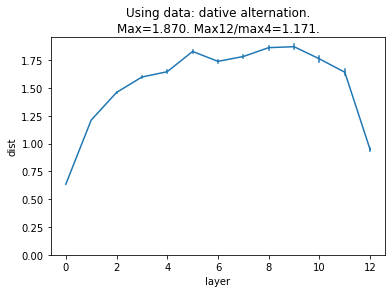

In [4]:
sents = sentgen.get_dative_alternation()
plot_distances(sents, 'dative alternation')

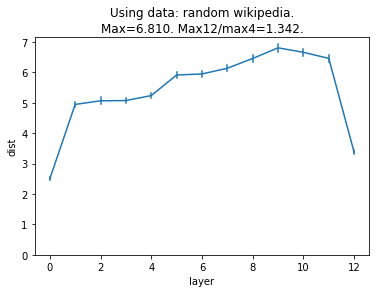

In [5]:
wiki_sents = sentgen.get_wikipedia()
plot_distances(wiki_sents, 'random wikipedia')

## Combined plot

## Other sentence types

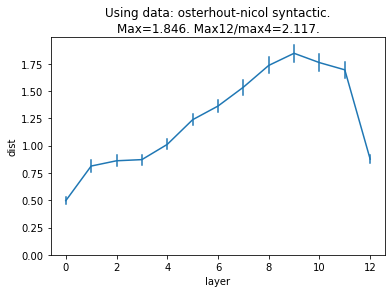

In [6]:
sents = sentgen.get_osterhout_nicol('syntactic')
plot_distances(sents, 'osterhout-nicol syntactic')

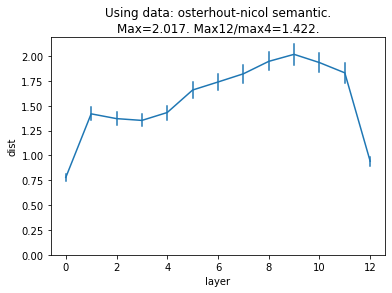

In [7]:
sents = sentgen.get_osterhout_nicol('semantic')
plot_distances(sents, 'osterhout-nicol semantic')

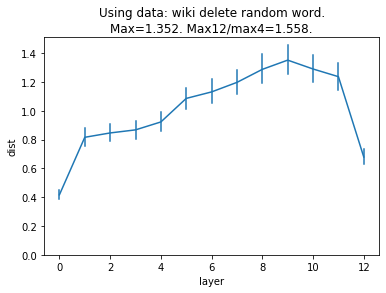

In [8]:
sents = sentgen.get_wikipedia_delete_random_word()
plot_distances(sents, 'wiki delete random word')

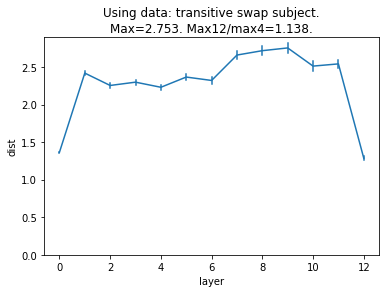

In [9]:
sents = sentgen.get_transitive_swap_subject()
plot_distances(sents, 'transitive swap subject')

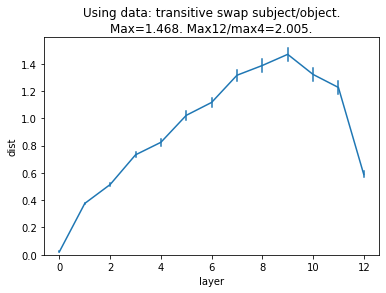

In [10]:
sents = sentgen.get_transitive_swap_subject_object()
plot_distances(sents, 'transitive swap subject/object')

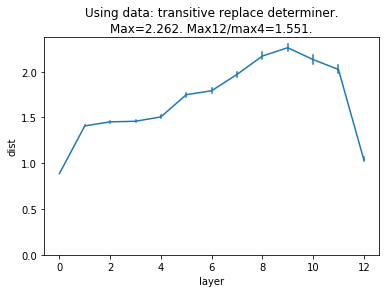

In [11]:
sents = sentgen.get_transitive_replace_determiner()
plot_distances(sents, 'transitive replace determiner')

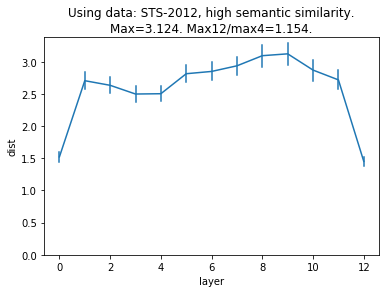

In [12]:
sents = sentgen.get_sts_2012('high')
plot_distances(sents, 'STS-2012, high semantic similarity')

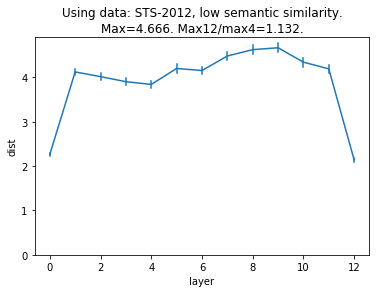

In [13]:
sents = sentgen.get_sts_2012('low')
plot_distances(sents, 'STS-2012, low semantic similarity')

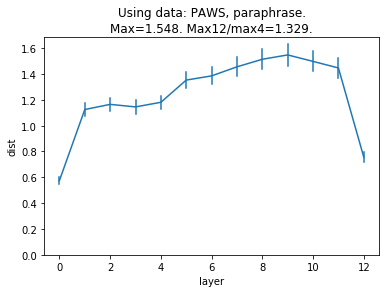

In [14]:
sents = sentgen.get_paws(True)
plot_distances(sents, 'PAWS, paraphrase')

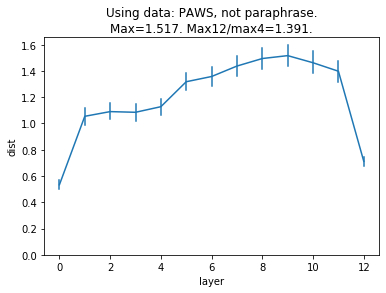

In [15]:
sents = sentgen.get_paws(False)
plot_distances(sents, 'PAWS, not paraphrase')

## Chinese examples

In [ ]:
enc = src.sent_encoder.SentEncoder(model_name='clue/roberta_chinese_base')
sentgen = src.sentpair_generator.SentPairGenerator()

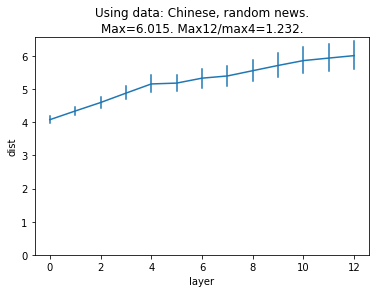

In [17]:
sents = sentgen.get_chinese_news()
plot_distances(sents, 'Chinese, random news')

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


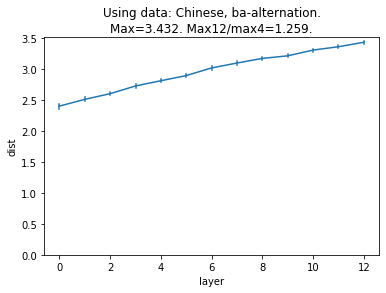

In [19]:
sents = sentgen.get_chinese_ba_alternation()
plot_distances(sents, 'Chinese, ba-alternation')